In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("example_datasets/ADNI_consol.csv")

In [15]:
df.drop(['PHASE','ID', 'SITEID', 'PTID', 'RID', 'VISCODE', 'DIAGNOSIS_Str', 'DX'], axis=1, inplace=True)
df.dropna(subset=['DIAGNOSIS'], inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_columns}")
label_encoders = {}
for col in categorical_columns:
    # Create a new encoder for each column
    le = LabelEncoder()
    # Fit and transform the column, handling NaN values
    not_null = df[col].notna()
    df.loc[not_null, col] = le.fit_transform(df.loc[not_null, col])
    # Store the encoder for future reference
    label_encoders[col] = le
    print(f"Encoded {col}: {le.classes_}")


Categorical columns to encode: ['PTETHCAT', 'PTGENDER', 'PTMARRY', 'PTRACCAT']
Encoded PTETHCAT: ['Hisp/Latino' 'Not Hisp/Latino' 'Unknown']
Encoded PTGENDER: ['Female' 'Male']
Encoded PTMARRY: ['Divorced' 'Married' 'Never married' 'Unknown' 'Widowed']
Encoded PTRACCAT: ['Am Indian/Alaskan' 'Asian' 'Black' 'More than one' 'Unknown' 'White']


In [17]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    if df[col].isna().any():
        mean_value = df[col].median()
        df[col].fillna(mean_value, inplace=True)
        print(f"Imputed NaN values in '{col}' with mean: {mean_value:.4f}")

Imputed NaN values in 'AGE' with mean: 73.0000
Imputed NaN values in 'PTEDUCAT' with mean: 16.0000
Imputed NaN values in 'VSWEIGHT' with mean: 76.0000
Imputed NaN values in 'VSHEIGHT' with mean: 169.0000
Imputed NaN values in 'VSBPSYS' with mean: 135.0000
Imputed NaN values in 'VSBPDIA' with mean: 76.0000
Imputed NaN values in 'VSPULSE' with mean: 64.0000
Imputed NaN values in 'VSRESP' with mean: 16.0000
Imputed NaN values in 'CLOCKSCOR' with mean: 5.0000
Imputed NaN values in 'COPYSCOR' with mean: 5.0000
Imputed NaN values in 'AVTOT1' with mean: 4.0000
Imputed NaN values in 'AVTOT2' with mean: 6.0000
Imputed NaN values in 'AVTOT3' with mean: 7.0000
Imputed NaN values in 'AVTOT4' with mean: 8.0000
Imputed NaN values in 'AVTOT5' with mean: 9.0000
Imputed NaN values in 'AVTOT6' with mean: 5.0000
Imputed NaN values in 'AVTOTB' with mean: 4.0000
Imputed NaN values in 'DSPANFOR' with mean: 8.0000
Imputed NaN values in 'DSPANFLTH' with mean: 6.0000
Imputed NaN values in 'DSPANBAC' with mean:

/var/folders/tp/s93g_ywj25q87c9hgdw53dtm0000gn/T/ipykernel_27318/3877866144.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/var/folders/tp/s93g_ywj25q87c9hgdw53dtm0000gn/T/ipykernel_27318/3877866144.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [ ]:
# Convert remaining object columns to numeric
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col] = df[col].astype(float)

In [32]:
df.to_csv("example_datasets/adni.csv", index=False)

In [26]:
df

,DIAGNOSIS,AGE,PTEDUCAT,PTETHCAT,PTGENDER,PTMARRY,PTRACCAT,VSWEIGHT,VSHEIGHT,VSBPSYS,...,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FDG,PIB,AV45,FBB
0,1.0,84.8,18.0,1.0,1.0,1.0,5.0,75.0,177.0,130.0,...,1.22222,1.0,1.0,1.00000,1.25,1.28947,1.18154,1.74375,1.0857,1.0495
1,1.0,76.3,16.0,1.0,0.0,1.0,5.0,61.0,169.0,116.0,...,1.22222,1.0,1.0,1.00000,1.25,1.28947,1.18154,1.74375,1.0857,1.0495
2,1.0,79.3,16.0,1.0,1.0,4.0,5.0,93.0,185.0,127.0,...,1.22222,1.0,1.0,1.00000,1.25,1.28947,1.18154,1.74375,1.0857,1.0495
3,3.0,77.5,12.0,1.0,1.0,1.0,5.0,82.0,181.0,132.0,...,1.22222,1.0,1.0,1.00000,1.25,1.28947,1.18154,1.74375,1.0857,1.0495
4,1.0,89.6,16.0,1.0,0.0,1.0,5.0,65.0,157.0,125.0,...,1.22222,1.0,1.0,1.00000,1.25,1.28947,1.18154,1.74375,1.0857,1.0495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2.0,73.3,20.0,1.0,0.0,4.0,5.0,49.0,166.0,151.0,...,1.44444,1.0,1.0,1.66667,1.00,1.45455,1.18154,1.74375,1.0857,1.0495
1639,1.0,71.2,16.0,1.0,0.0,1.0,2.0,69.0,161.0,157.0,...,1.00000,1.0,1.0,1.00000,1.00,1.00000,1.18154,1.74375,1.0857,1.0495
1640,1.0,63.7,12.0,1.0,1.0,1.0,2.0,72.0,178.0,138.0,...,1.00000,1.0,1.0,1.00000,1.00,1.05263,1.18154,1.74375,1.0857,1.0495
1641,1.0,70.8,18.0,1.0,1.0,1.0,1.0,79.0,173.0,154.0,...,1.22222,1.0,1.6,2.00000,1.25,1.37838,1.18154,1.74375,1.0857,1.0495


In [29]:
df['DIAGNOSIS'] = df['DIAGNOSIS'].astype(int)

In [35]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X = df.drop('DIAGNOSIS', axis=1)
y = df['DIAGNOSIS']

# Verify no object columns remain
print(f"X dtypes: {X.dtypes.value_counts()}")

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)
model_params = {
    'objective': 'multiclass',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'n_estimators': 100,
    'random_state': 42,
    'early_stopping_rounds': 20,
    'verbosity': -1
}
model = lgb.LGBMClassifier(**model_params)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

preds = model.predict(X_test)

acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")




X dtypes: float64    99
Name: count, dtype: int64
Accuracy: 0.9472


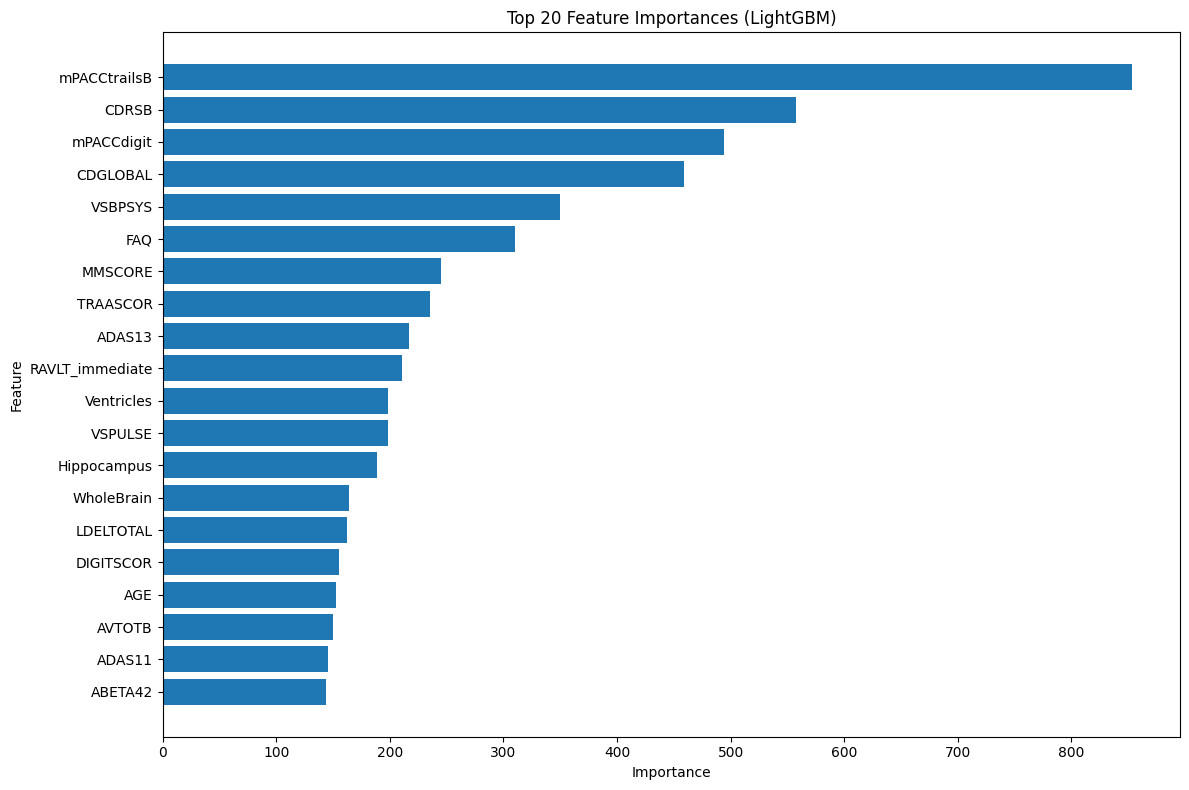

Top 10 most important features:
            Feature  Importance
72     mPACCtrailsB         853
54            CDRSB         558
71       mPACCdigit         494
53         CDGLOBAL         459
8           VSBPSYS         350
70              FAQ         310
12          MMSCORE         245
32         TRAASCOR         235
62           ADAS13         217
65  RAVLT_immediate         211


In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances (LightGBM)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest importance at the top
plt.tight_layout()
plt.show()

# Print top 10 features and their importance values
print("Top 10 most important features:")
print(feature_importance_df.head(10))